# Learning goals
After today's lesson you should be able to:
- Use the Google Maps API via the `googlemaps` library to: 
    - Find geometry routes between two points
    - Geocode addresses
    - Get points of interest
- (Optional): Use `beautifulsoup` to scrape website information


In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as cx

import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context(context='paper')

os.getcwd()

'/Users/wenfeixu/Documents/GITHUB/4680_5680_intro_uds/Week5'


# 1. Google Cloud

Google Cloud is a set of "cloud computing" services that consists of physical assets like computers and hard drives, and virtual resources, like computing environments, that is often used for data storage and management, tools for computing and software development, machine learning, and more. 

You may have heard of Amazon AWS and Microsoft Azure, these are Amazon and Microsoft's cloud computing offerings that all have similar capabilities. 

To note: These "cloud" computers and services don't live in some ephemeral space. You can actually see the locations of [Google Data Centers](https://www.google.com/about/datacenters/locations/). 

This is what the Dalles, Oregon Google data center looks like from satellite imagery. It's just a giant building filled with a lot of computers:  
<iframe src="https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d1390.42297102674!2d-121.20177632936587!3d45.63191557459542!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x54961ebdb45cdec5%3A0x4bde13efb5371001!2sThe%20Dalles%20Google%20Data%20Center!5e1!3m2!1sen!2sus!4v1676841727765!5m2!1sen!2sus" width="1000" height="600"  style="display: block; margin: 0 auto"  allowfullscreen="" loading="lazy" referrerpolicy="no-referrer-when-downgrade"></iframe>

The Google Maps API is a tool that allows us to use some of the engines and retrieve datasets underlying Google Maps.


## 1.0 Getting started
To get started, we need to **create an API key**. An API key is a code or id provided by the client that is passed to the API that allows it to identify which user/project is calling the API to keep track of your usage and access. It also allows you to keep track of your API usage for particular projects and applications. 

You'll need your Cornell account to proceed. Please refer my Slack message from earlier this week on the details. 

- Go to the [Google Cloud console](https://console.cloud.google.com/), which is your landing page for all Google computing services (geocoding API is one of many tools you can use through the Google Cloud).
- If your default account is your personal gmail (like it is mine), make sure to switch it to your Cornell email on the top right-hand corner.
- You'll have to agree to their terms of service before proceeding (I think). An [interesting read](https://cloud.google.com/terms/?authuser=1) for another time.
- This should take you to a page like this:
</figure>
<img src="https://www.dropbox.com/s/wj9igmb9dhlb3ba/Screen%20Shot%202023-02-19%20at%204.29.43%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

- In the upper-left corner, click **Select a project** and **NEW PROJECT**. All API keys are associated with projects, which is more for developers who are using the services more heavily. This is so that we separate usage and keep track of what projects are using how much of which resources.
</figure>
<img src="https://www.dropbox.com/s/vwje4uz06tlvlo9/Screen%20Shot%202023-02-19%20at%204.33.29%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

- Here, input a project name. You'll need to create a **globally unique** name, all lower case, no spaces only dashes name. I'm calling this project `introUDS-wx233`. You can call yours `introUDS-YOURNETID`
- Once you click ok it will take a few seconds to create the project.
- In the console, select your new project `introUDS-wx233` (for me).
- From here, go to the sidebar menu, select **Google Maps Platform->APIs**

</figure>
<img src="https://www.dropbox.com/s/ru6b367zd6jwh1l/Screen%20Shot%202023-02-19%20at%204.34.48%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

- You will be given an API key. Save that down somewhere. 
- You will also be asked to **Protect your API key** by limiting its use.
    - Select **API restriction** and check all the APIs in the dropdown for now. 
    
</figure>
<img src="https://www.dropbox.com/s/ked2jfofqpqqpab/Screen%20Shot%202023-02-19%20at%204.37.33%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>



## 1.1 Saving your key as an environmental variable
Because your API key (you may sometimes see them referred to ask "tokens") gives anyone who knows it the ability to use the API as you or your project, it is important that you don't publish it, just like you would not publish your passwords. 

How, then, can we create public notebooks, using a key, while keeping our API keys private?

Note: It is sometimes ok to publish public APIs which are demonstration keys and have limits on their use. 

- One way is to manually replace your API key with a string like `YOUR-API-KEY-HERE` when you publish something. 
- Another is to save these to your system files using **environment variables**. 

**Environment variables** are variables saved onto your computer. 


Here we are going create an environmental variable called `GMAPS_API_KEY` that will point to our Google Maps API key as a string. Here we are following [conda's documentation](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#setting-environment-variables)
- Open up your **Anaconda Power Shell** and complete the following steps (your window will look different from mine, but the commands are the same)
</figure>
<img src="https://www.dropbox.com/s/hb4momsk2yp7nb9/Screen%20Shot%202023-02-19%20at%205.11.07%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

Activate our `gds_py` environment. 
</figure>
<img src="https://www.dropbox.com/s/v8b4copn5cohrle/Screen%20Shot%202023-02-19%20at%205.11.48%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

Get help on what we can do with the config vars. See that the `-h` is a flag for getting help on what some functions can do with the following command: 
```
conda env config vars -h
```

</figure>
<img src="https://www.dropbox.com/s/xssb60iqgylp1pl/Screen%20Shot%202023-02-19%20at%205.12.37%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

Use the snippet from one of the examples given to us by the help function. Make sure to include the quotes around your api key. 
```
conda env config vars set GMAP_API_KEY='insert-your-api-key-here'
```
</figure>
<img src="https://www.dropbox.com/s/zrhhv4afnaxbwx2/Screen%20Shot%202023-02-19%20at%205.19.36%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>


Now deactivate your environment with the following. You might also need to also restart your Anaconda. 
```
conda deactivate
```

If you are working with conda and jupyter lab from the command line: 
```
conda activate gds_py
```

Otherwise, re-open your Anaconda program and restart this jupyter lab notebook. Re-run our imports cell above.



In [4]:
api_key = os.environ.get('GMAP_API_KEY')


## Your API key should show up here
# print(api_key)

In [ ]:
api_key ='yourAPIKEY'

## 1.2 Installing the `googlemaps` library
Here, the `-U` flag stands for installing the latest version of the library.


In [5]:
!pip install -U googlemaps

## 1.3 Geocoding
[Google Geocoding API documentation](https://developers.google.com/maps/documentation/geocoding/overview)

In [6]:
import googlemaps
from datetime import datetime

gmaps = googlemaps.Client(key=api_key)

In [ ]:
gmaps.

In [9]:
# Geocoding an address
geocode_result = gmaps.geocode("921 University Ave, Ithaca, NY 14853")

In [10]:
geocode_result

[{'address_components': [{'long_name': '921',
    'short_name': '921',
    'types': ['street_number']},
   {'long_name': 'University Avenue',
    'short_name': 'University Ave',
    'types': ['route']},
   {'long_name': 'Ithaca',
    'short_name': 'Ithaca',
    'types': ['locality', 'political']},
   {'long_name': 'Tompkins County',
    'short_name': 'Tompkins County',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'New York',
    'short_name': 'NY',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']},
   {'long_name': '14853', 'short_name': '14853', 'types': ['postal_code']}],
  'formatted_address': '921 University Ave, Ithaca, NY 14853, USA',
  'geometry': {'location': {'lat': 42.4512236, 'lng': -76.4828622},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 42.45266253029149,
     'lng': -76.48148931970849},
    'southwest': {'lat':

We were returned a JSON, which is just a nested dictionary of key-value pairs. 

In its simplest version, this is how JSONs and dictionaries are structured: 

</figure>
<img src="https://www.softwaretestinghelp.com/wp-content/qa/uploads/2017/12/Including-Car-in-Employee-JSON.jpg" alt="drawing" width="600" style="display: block; margin: 0 auto"/>
</figure>

What "nested" means is just that a the value associated with a key can be a dictionary itself. 
</figure>
<img src="https://help.rapid7.com/insightidr/content/resources/images/json/nested-json.png" alt="drawing" width="600" style="display: block; margin: 0 auto"/>
</figure>



Let's dig into the part of the JSON that we actually care about, which is that `'geometry': {'location': {'lat': 42.4512236, 'lng': -76.4828622},` section. 

In [11]:
### That was a  list, so let's get the first value
geocode_result[0]

{'address_components': [{'long_name': '921',
   'short_name': '921',
   'types': ['street_number']},
  {'long_name': 'University Avenue',
   'short_name': 'University Ave',
   'types': ['route']},
  {'long_name': 'Ithaca',
   'short_name': 'Ithaca',
   'types': ['locality', 'political']},
  {'long_name': 'Tompkins County',
   'short_name': 'Tompkins County',
   'types': ['administrative_area_level_2', 'political']},
  {'long_name': 'New York',
   'short_name': 'NY',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': 'United States',
   'short_name': 'US',
   'types': ['country', 'political']},
  {'long_name': '14853', 'short_name': '14853', 'types': ['postal_code']}],
 'formatted_address': '921 University Ave, Ithaca, NY 14853, USA',
 'geometry': {'location': {'lat': 42.4512236, 'lng': -76.4828622},
  'location_type': 'ROOFTOP',
  'viewport': {'northeast': {'lat': 42.45266253029149,
    'lng': -76.48148931970849},
   'southwest': {'lat': 42.4499645697085, 'lng':

In [13]:
geocode_result[0]['geometry']['location']

{'lat': 42.4512236, 'lng': -76.4828622}

In [14]:
print(geocode_result[0]['geometry']['location']['lng'],
     geocode_result[0]['geometry']['location']['lat'])

-76.4828622 42.4512236


Now that we have the lng/lat, you can see how we can turn these into geometries. 

## 1.2.1 Geocoding a df
Let's use an example that has multiple rows. The geocoder only processes 1 request at a time, so we have to run the geocoder on each row of a df. 

Let's take a look at the Department of Building's Permit Issuance dataset. The DOB requires a permit for construction and demolition activities. 

In [15]:
dob_permits_url = 'https://data.cityofnewyork.us/resource/ipu4-2q9a.json?$limit=5'
dob_permits= pd.read_json(dob_permits_url)

In [16]:
dob_permits

,borough,bin__,house__,street_name,job__,job_doc___,job_type,self_cert,block,lot,...,dobrundate,permit_si_no,gis_latitude,gis_longitude,gis_council_district,gis_census_tract,gis_nta_name,residential,special_district_1,site_fill
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,853,2,...,05/11/2022 00:00:00,3905851,40.740909,-73.987947,2,56,Hudson Yards-Chelsea-Flatiron-Union Square,NaN,NaN,NaN
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,5687,66,...,05/11/2022 00:00:00,3905852,40.563654,-74.179584,51,17008,Arden Heights,YES,SRD,NOT APPLICABLE
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,64,22,...,05/11/2022 00:00:00,3905853,40.639633,-74.094169,49,81,West New Brighton-New Brighton-St. George,YES,HS,NOT APPLICABLE
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,5260,1,...,05/11/2022 00:00:00,3905854,40.544597,-74.157153,51,15601,Great Kills,YES,SRD,NOT APPLICABLE
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,4242,45,...,05/11/2022 00:00:00,3905855,40.566798,-74.119726,50,134,New Dorp-Midland Beach,YES,NaN,NOT APPLICABLE


See that we have different columns that refer to the 
- House number
- Street Name
- (Optionally: Borough)

We know all the address are in NYC. All of our relevant columns need to be strings in order for us to concatenate these columns together. 


In [17]:
dob_permits.dtypes

borough                       object
bin__                          int64
house__                        int64
street_name                   object
job__                          int64
job_doc___                     int64
job_type                      object
self_cert                     object
block                          int64
lot                            int64
community_board                int64
zip_code                       int64
bldg_type                      int64
work_type                     object
permit_status                 object
filing_status                 object
permit_type                   object
permit_sequence__              int64
permit_subtype                object
filing_date                   object
issuance_date                 object
expiration_date               object
job_start_date                object
permittee_s_first_name        object
permittee_s_last_name         object
permittee_s_business_name     object
permittee_s_phone__            int64
p

In [18]:
dob_permits['house__'] = dob_permits['house__'].astype(str)
dob_permits['street_name'] = dob_permits['street_name'].astype(str)
dob_permits['borough'] = dob_permits['borough'].astype(str)

In [19]:
dob_permits['address'] = dob_permits['house__'] + ' ' + \
                        dob_permits['street_name'] + ', ' + \
                        dob_permits['borough'] + ', ' + 'NY'

In [20]:
dob_permits['address']

0               1 MADISON AVE, MANHATTAN, NY
1        87 BOYLAN STREET, STATEN ISLAND, NY
2    217 LAFAYETTE AVENUE, STATEN ISLAND, NY
3      170 OAKDALE STREET, STATEN ISLAND, NY
4           273 10 STREET, STATEN ISLAND, NY
Name: address, dtype: object

Let's first create two new columns: `lng` and `lat`

In [21]:
dob_permits['lng'] = ""
dob_permits['lat'] = ""

In [22]:
for i, row in dob_permits.iterrows(): 
    print(f"Current row is {i}")
    row_result = gmaps.geocode(row['address'])

    ## We are going to assign the geocoded lat/lng to each row
    dob_permits.loc[i,'lat'] = row_result[0]['geometry']['location']['lat']
    dob_permits.loc[i,'lng'] = row_result[0]['geometry']['location']['lng']
    

Current row is 0
Current row is 1
Current row is 2
Current row is 3
Current row is 4


In [23]:
dob_permits

,borough,bin__,house__,street_name,job__,job_doc___,job_type,self_cert,block,lot,...,gis_longitude,gis_council_district,gis_census_tract,gis_nta_name,residential,special_district_1,site_fill,address,lng,lat
0,MANHATTAN,1088749,1,MADISON AVE,141008987,1,A3,Y,853,2,...,-73.987947,2,56,Hudson Yards-Chelsea-Flatiron-Union Square,NaN,NaN,NaN,"1 MADISON AVE, MANHATTAN, NY",-73.987518,40.741149
1,STATEN ISLAND,5076937,87,BOYLAN STREET,540218539,1,A2,Y,5687,66,...,-74.179584,51,17008,Arden Heights,YES,SRD,NOT APPLICABLE,"87 BOYLAN STREET, STATEN ISLAND, NY",-74.179754,40.563871
2,STATEN ISLAND,5001506,217,LAFAYETTE AVENUE,540218575,1,A2,Y,64,22,...,-74.094169,49,81,West New Brighton-New Brighton-St. George,YES,HS,NOT APPLICABLE,"217 LAFAYETTE AVENUE, STATEN ISLAND, NY",-74.093874,40.639461
3,STATEN ISLAND,5067021,170,OAKDALE STREET,540218600,1,A2,Y,5260,1,...,-74.157153,51,15601,Great Kills,YES,SRD,NOT APPLICABLE,"170 OAKDALE STREET, STATEN ISLAND, NY",-74.157021,40.544417
4,STATEN ISLAND,5058036,273,10 STREET,540218628,1,A2,Y,4242,45,...,-74.119726,50,134,New Dorp-Midland Beach,YES,NaN,NOT APPLICABLE,"273 10 STREET, STATEN ISLAND, NY",-74.119936,40.566948


In [24]:
## 
dob_permits_geo = gpd.GeoDataFrame(dob_permits,
                            geometry=gpd.points_from_xy(dob_permits['lng'], dob_permits['lat']),
                            crs='EPSG:4326')

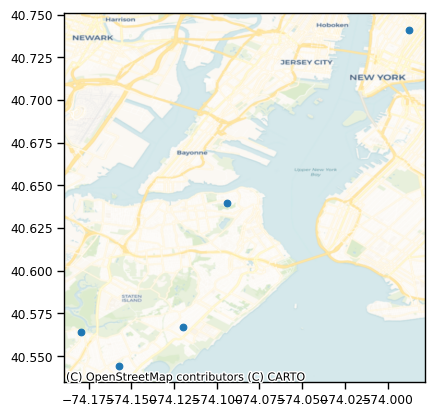

In [25]:

ax = dob_permits_geo.plot()
cx.add_basemap(ax = ax,crs=dob_permits_geo.crs,source=cx.providers.CartoDB.Voyager)



## Q.1 Geocoding
- Create a DF of any five places you have visited or traveled to across the world 
    - Try inserting some typos, alternative spellings or names for these places. (For ex, Sibley Hall instead of 921 University Ave.)
- Geocode these using the google maps API. 
- Map these five points, using contextily as a basemap service. 
- How accurate was the geocoder in finding the locations of these places? 

In [ ]:
## INSERT YOUR CODE HERE

## 1.2.2 Reverse geocoding
In the same way that you can turn addresses to Lng/Lats, you can do the same. 

In [26]:
## Note, that the format here is Lat, Lng!
reverse_geocode_result = gmaps.reverse_geocode((42.4512236,-76.4828622))


In [27]:
reverse_geocode_result

[{'address_components': [{'long_name': '921',
    'short_name': '921',
    'types': ['street_number']},
   {'long_name': 'University Avenue',
    'short_name': 'University Ave',
    'types': ['route']},
   {'long_name': 'Ithaca',
    'short_name': 'Ithaca',
    'types': ['locality', 'political']},
   {'long_name': 'Tompkins County',
    'short_name': 'Tompkins County',
    'types': ['administrative_area_level_2', 'political']},
   {'long_name': 'New York',
    'short_name': 'NY',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': 'United States',
    'short_name': 'US',
    'types': ['country', 'political']},
   {'long_name': '14850', 'short_name': '14850', 'types': ['postal_code']}],
  'formatted_address': '921 University Ave, Ithaca, NY 14850, USA',
  'geometry': {'location': {'lat': 42.4512236, 'lng': -76.4828622},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 42.4525725802915,
     'lng': -76.4815132197085},
    'southwest': {'lat': 4

In [28]:
## Ta da!
reverse_geocode_result[0]['formatted_address']

'921 University Ave, Ithaca, NY 14850, USA'

## 1.3 Getting Points of Interest
[Google Places API documentation](https://developers.google.com/maps/documentation/places/web-service/overview)


In [29]:
### The query can be anything you would typically type into
### the google maps search
### radius is in meters
### You can also input the lat/lng directly

places_to_eat = gmaps.places("restaurants",
                             location = "921 University Ave, Ithaca, NY",
                            #  location = (42.4512236,-76.4828622),
                         radius=100)

In [30]:
places_to_eat.keys()

dict_keys(['html_attributions', 'next_page_token', 'results', 'status'])

In [31]:
len(places_to_eat['results'])

20

In [32]:
places_to_eat['results']

[{'business_status': 'OPERATIONAL',
  'formatted_address': '130 Statler Dr, Ithaca, NY 14853, United States',
  'geometry': {'location': {'lat': 42.4461438, 'lng': -76.48217149999999},
   'viewport': {'northeast': {'lat': 42.44771417989273,
     'lng': -76.48066677010729},
    'southwest': {'lat': 42.44501452010728, 'lng': -76.48336642989273}}},
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/restaurant-71.png',
  'icon_background_color': '#FF9E67',
  'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/restaurant_pinlet',
  'name': 'The Terrace Restaurant',
  'opening_hours': {'open_now': False},
  'photos': [{'height': 750,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/107198236689954161300">A Google User</a>'],
    'photo_reference': 'AfLeUgNb-1hydYDHDUBkb5MX8Zb37s_FgD54ws0Z7VdRjftwDSV5GjZnLqUjYuQuRWMO5oxTc0b7rJ5vqUr32uRFiS2p_TuZ8lQl_JpgbJzRlC23lkkZzkM2nmPMbd4DzOHSUVKQ4HhPDIPpuTyeloKvLnByvi7ZP5aGV_A-Iu57pXA5Xpy

In [34]:
places_to_eat['results'][0]

{'business_status': 'OPERATIONAL',
 'formatted_address': '130 Statler Dr, Ithaca, NY 14853, United States',
 'geometry': {'location': {'lat': 42.4461438, 'lng': -76.48217149999999},
  'viewport': {'northeast': {'lat': 42.44771417989273,
    'lng': -76.48066677010729},
   'southwest': {'lat': 42.44501452010728, 'lng': -76.48336642989273}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/restaurant-71.png',
 'icon_background_color': '#FF9E67',
 'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/restaurant_pinlet',
 'name': 'The Terrace Restaurant',
 'opening_hours': {'open_now': False},
 'photos': [{'height': 750,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/107198236689954161300">A Google User</a>'],
   'photo_reference': 'AfLeUgNb-1hydYDHDUBkb5MX8Zb37s_FgD54ws0Z7VdRjftwDSV5GjZnLqUjYuQuRWMO5oxTc0b7rJ5vqUr32uRFiS2p_TuZ8lQl_JpgbJzRlC23lkkZzkM2nmPMbd4DzOHSUVKQ4HhPDIPpuTyeloKvLnByvi7ZP5aGV_A-Iu57pXA5Xpyc',
   'width'

In [35]:
list_of_restaurants = []

for each in places_to_eat['results']: 
    listing_values = [each['name'],
                      each['geometry']['location']['lng'], 
                      each['geometry']['location']['lat'],
                        each['rating'],
                        each['user_ratings_total'],
                        each['photos'][0]['photo_reference']]
    list_of_restaurants.append(listing_values)

In [37]:
# list_of_restaurants

In [38]:
places_to_eat_df = pd.DataFrame(list_of_restaurants,columns=['name','lng','lat','rating','user_ratings_total','photo_reference'])

In [44]:
places_to_eat_df

,name,lng,lat,rating,user_ratings_total,photo_reference,geometry
0,The Terrace Restaurant,-76.482171,42.446144,4.5,129,AfLeUgNb-1hydYDHDUBkb5MX8Zb37s_FgD54ws0Z7VdRjf...,POINT (-76.48217 42.44614)
1,Mac's Cafe,-76.482058,42.445968,4.1,52,AfLeUgNk1HPaKnGbh68Jaw5rkD4US8AbR5wZlGTGapihan...,POINT (-76.48206 42.44597)
2,Jack's Grill,-76.485785,42.441697,3.2,254,AfLeUgOyLXO3BAuyAS2k7L2QtKdMISnEE-YT2uX9KQ0u4E...,POINT (-76.48578 42.44170)
3,Dos Amigos,-76.485165,42.441823,4.2,103,AfLeUgPDkCY3Xo_4fv93RjxnShSIFQcEsQl-fKf9sOlkuK...,POINT (-76.48517 42.44182)
4,Loumies,-76.485898,42.441688,4.7,60,AfLeUgMoGMS8leTSp0PKc_m_k_Z4-DFnj_K-If5Ke5hZV-...,POINT (-76.48590 42.44169)
5,Old Mexico Express,-76.486649,42.441611,4.2,39,AfLeUgPVdilKBWwDb84rKpZvOPRFPr7An8zAryjESoVoKs...,POINT (-76.48665 42.44161)
6,Luna Inspired Street Food Collegetown,-76.486564,42.441837,3.4,375,AfLeUgOnhzwPclm9GjKC5tf83s_V5BJCyZyN2G15qyO91b...,POINT (-76.48656 42.44184)
7,Pho Time Vietnamese Cuisine,-76.484603,42.441862,4.1,97,AfLeUgO0Qo70erL4J6s-Fp2d7XFjUKTFFY350lIJp2Fwaz...,POINT (-76.48460 42.44186)
8,Souvlaki House,-76.487298,42.441387,4.3,289,AfLeUgOBuWfGs2BOfrAJr3xiJ9bbGl7So3U2G0AIJE8yy9...,POINT (-76.48730 42.44139)
9,Wings Over Ithaca,-76.486386,42.441486,4.2,339,AfLeUgMgPMdtbRV0LG-E5a843OPswWcvEaW2CDJiD3Jl-E...,POINT (-76.48639 42.44149)


In [41]:
places_to_eat_df_geo = gpd.GeoDataFrame(places_to_eat_df,
                                        geometry=gpd.points_from_xy(places_to_eat_df['lng'], places_to_eat_df['lat']),
                                        crs='EPSG:4326')

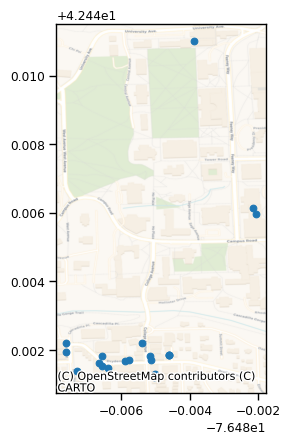

In [45]:
ax = places_to_eat_df_geo.plot()
cx.add_basemap(ax = ax,crs=places_to_eat_df_geo.crs,source=cx.providers.CartoDB.Voyager)


## 1.4 Getting a route and distances
[Google Directions API documentation](https://developers.google.com/maps/documentation/directions)

In [46]:
now = datetime.now()

In [47]:
now

datetime.datetime(2023, 2, 22, 15, 46, 41, 216948)

In [48]:
## mode can be driving, walking, bicycling, transit
now = datetime.now()


directions_result = gmaps.directions("921 University Ave, Ithaca, NY",
                                     "Maru Ramen, Ithaca, NY",
                                     mode="driving",
                                     departure_time=now)

In [49]:
## Notice that this is a list of one elemment
directions_result

[{'bounds': {'northeast': {'lat': 42.4514183, 'lng': -76.4828144},
   'southwest': {'lat': 42.4393022, 'lng': -76.5068107}},
  'copyrights': 'Map data ©2023 Google',
  'legs': [{'distance': {'text': '2.0 mi', 'value': 3221},
    'duration': {'text': '8 mins', 'value': 480},
    'duration_in_traffic': {'text': '8 mins', 'value': 495},
    'end_address': '512 W State St, Ithaca, NY 14850, USA',
    'end_location': {'lat': 42.4393022, 'lng': -76.5068107},
    'start_address': '921 University Ave, Ithaca, NY 14853, USA',
    'start_location': {'lat': 42.4514035, 'lng': -76.4828144},
    'steps': [{'distance': {'text': '0.5 mi', 'value': 743},
      'duration': {'text': '1 min', 'value': 89},
      'end_location': {'lat': 42.449279, 'lng': -76.4903449},
      'html_instructions': 'Head <b>west</b> on <b>University Ave</b>',
      'polyline': {'points': 'ghbbGp`yqMAJAX?\\Bd@JdD@r@FvB@J?N@\\?VAT?h@?N?P?tA@J@H@@BFBFFJHHHHXNdA`@NF`@N`@LDBJD`@VDDTZT\\DHHJR^FLDJBHDF?@@B@@@?Dl@?DFrC?bAAdA?RAhA'},


In [50]:
len(directions_result)

1

We can use the `.keys()` 

In [51]:
directions_result[0].keys()

dict_keys(['bounds', 'copyrights', 'legs', 'overview_polyline', 'summary', 'warnings', 'waypoint_order'])

Neat! We can see that this has output a lot of different kinds of information. What we'll need next is to parse the information. 

Notice that the directions are in `'legs'`. This is the equivalent to each step in Google Map directions. We'll have to put the pieces together to get any information about the whole route. 



In [52]:
## Let's access the first/only element
## and then the values in the legs key
## which is another list
directions_result[0]['legs']

[{'distance': {'text': '2.0 mi', 'value': 3221},
  'duration': {'text': '8 mins', 'value': 480},
  'duration_in_traffic': {'text': '8 mins', 'value': 495},
  'end_address': '512 W State St, Ithaca, NY 14850, USA',
  'end_location': {'lat': 42.4393022, 'lng': -76.5068107},
  'start_address': '921 University Ave, Ithaca, NY 14853, USA',
  'start_location': {'lat': 42.4514035, 'lng': -76.4828144},
  'steps': [{'distance': {'text': '0.5 mi', 'value': 743},
    'duration': {'text': '1 min', 'value': 89},
    'end_location': {'lat': 42.449279, 'lng': -76.4903449},
    'html_instructions': 'Head <b>west</b> on <b>University Ave</b>',
    'polyline': {'points': 'ghbbGp`yqMAJAX?\\Bd@JdD@r@FvB@J?N@\\?VAT?h@?N?P?tA@J@H@@BFBFFJHHHHXNdA`@NF`@N`@LDBJD`@VDDTZT\\DHHJR^FLDJBHDF?@@B@@@?Dl@?DFrC?bAAdA?RAhA'},
    'start_location': {'lat': 42.4514035, 'lng': -76.4828144},
    'travel_mode': 'DRIVING'},
   {'distance': {'text': '0.6 mi', 'value': 978},
    'duration': {'text': '2 mins', 'value': 127},
    

In [53]:
len(directions_result[0]['legs'])

1

In [55]:
directions_result[0]['legs'][0]['steps']

[{'distance': {'text': '0.5 mi', 'value': 743},
  'duration': {'text': '1 min', 'value': 89},
  'end_location': {'lat': 42.449279, 'lng': -76.4903449},
  'html_instructions': 'Head <b>west</b> on <b>University Ave</b>',
  'polyline': {'points': 'ghbbGp`yqMAJAX?\\Bd@JdD@r@FvB@J?N@\\?VAT?h@?N?P?tA@J@H@@BFBFFJHHHHXNdA`@NF`@N`@LDBJD`@VDDTZT\\DHHJR^FLDJBHDF?@@B@@@?Dl@?DFrC?bAAdA?RAhA'},
  'start_location': {'lat': 42.4514035, 'lng': -76.4828144},
  'travel_mode': 'DRIVING'},
 {'distance': {'text': '0.6 mi', 'value': 978},
  'duration': {'text': '2 mins', 'value': 127},
  'end_location': {'lat': 42.440669, 'lng': -76.4897649},
  'html_instructions': 'Turn <b>left</b> onto <b>Stewart Ave</b>',
  'maneuver': 'turn-left',
  'polyline': {'points': '_{abGrozqMx@@j@AR?z@?Z?B?fAAH?|AAfBCTAF?LAPCRCHCXEHE|Aa@TIJE@?DAHGDAJIJKHGb@a@DEDEDEBADC@?HCFAFAD?R@~CVv@HF@F@@?B?JBD?d@FJ@HBRDv@V^FR@\\Ab@AhBEnCEb@C'},
  'start_location': {'lat': 42.449279, 'lng': -76.4903449},
  'travel_mode': 'DRIVING'},
 {'distan

We can get the total time and distance that it took: 
- `directions_result[0]['legs'][0]['steps'][i]['distance']` gives us the distance of that leg
- `directions_result[0]['legs'][0]['steps'][i]['duration']` gives us the duration of that leg

In [56]:
distance_list = []
duration_list = []
for each in directions_result[0]['legs'][0]['steps']: 
    ## Here we are going to get the 'value' after the 'distance' key. 
    ## For the distance, this is given in meters
    # # The duration is in seconds.  
    distance_list.append(each['distance']['value'])
    duration_list.append(each['duration']['value'])

In [57]:
print(distance_list)
print(duration_list)

[743, 978, 1348, 96, 56]
[89, 127, 216, 24, 24]


Now, we can create a df, where each row could include the distance, duration, and (eventually) the route geometry

First, we'll need a list with the sums of each of the `duration_list` and `distance_list`. 

In [58]:
## Note that, because pandas takes each element in the list as a row,
## We need to wrap the list in another list
summed_route_data = [[sum(distance_list),sum(duration_list)]]


In [59]:
summed_route_data

[[3221, 480]]

Then, we'll need a list of the respective column names

In [60]:
col_names = ['distance','duration']

In [61]:
routes = pd.DataFrame(summed_route_data,
                      columns=col_names)

In [62]:
routes

,distance,duration
0,3221,480


Turning the polyline string into points. Note that Google Maps includes an encoded version of, in this case, a polyline, which we can turn back into a shapely geometry. 

I found this function online to help me do this. `get_linestring()` takes a Google encoded polyline and turns it into a geometry, using the `decode_polyline()` function. Don't worry too much about what `decode_polyline()` is doing, except that some helpful person has created a decoder for us to use. 

In [63]:
import json
import fiona
import pandas as pd
from shapely.geometry import LineString, mapping, shape

def decode_polyline(polyline_str):
    '''Pass a Google Maps encoded polyline string; returns list of lat/lon pairs'''
    index, lat, lng = 0, 0, 0
    coordinates = []
    changes = {'latitude': 0, 'longitude': 0}

    # Coordinates have variable length when encoded, so just keep
    # track of whether we've hit the end of the string. In each
    # while loop iteration, a single coordinate is decoded.
    while index < len(polyline_str):
        # Gather lat/lon changes, store them in a dictionary to apply them later
        for unit in ['latitude', 'longitude']: 
            shift, result = 0, 0

            while True:
                byte = ord(polyline_str[index]) - 63
                index+=1
                result |= (byte & 0x1f) << shift
                shift += 5
                if not byte >= 0x20:
                    break

            if (result & 1):
                changes[unit] = ~(result >> 1)
            else:
                changes[unit] = (result >> 1)

        lat += changes['latitude']
        lng += changes['longitude']

        coordinates.append((lng / 100000.0, lat / 100000.0))

    return coordinates

def get_linestring(data):
    # with open(trip_name + '.json', 'r') as data_file:    
    #     data = json.load(data_file, encoding='ISO-8859-1')

    the_points = []
    for step in data[0]['legs'][0]['steps']:
        the_points += decode_polyline(step['polyline']['points'])

    return LineString(the_points)


In [64]:
## Here, I am getting the linestring from the directions result
geom = shape(mapping(get_linestring(directions_result)))

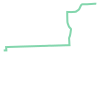

In [65]:
geom

In [66]:
routes['geom']=geom

In [67]:
routes_geo =gpd.GeoDataFrame(routes, geometry='geom', crs='EPSG:4326')

In [68]:
routes_geo

,distance,duration,geom
0,3221,480,"LINESTRING (-76.48281 42.45140, -76.48287 42.4..."


Chaning to 3857 because it looks better. 

In [69]:
routes_geo_3857 = routes_geo.to_crs(epsg=3857)

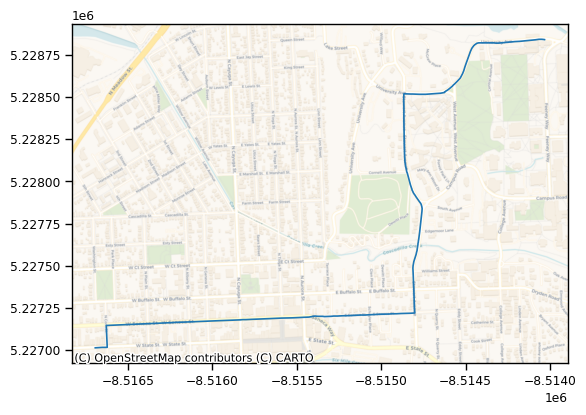

In [70]:
import contextily as cx
data_ax = routes_geo_3857.plot()
cx.add_basemap(ax = data_ax,crs=routes_geo_3857.crs,source=cx.providers.CartoDB.Voyager)

## Q.2 Routing 
- Create a geodataframe with one row that describes the walking route from the **Johnson Art Museum** to the **Purity Ice Cream Co.**
- This gdf should have the following columns: start lng,start lat, start name, end lng, end lat, end name, geometry for the route, walking distance in kilometers, walking duration in minutes.

In [ ]:
## INSERT YOUR CODE HERE

## 1.4 Billing
Note that the Geocoder is **billed by usage**. Here is the pricing model: 
</figure>
<img src="https://www.dropbox.com/s/jqmy92vncaar573/Screen%20Shot%202023-02-19%20at%205.50.16%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>


Think carefully about what you are querying and pay attention to your usage. Don't use up all your credits!

# 2. OPTIONAL: `beautifulsoup`

Webscraping is a method of programmatically retrieving data from websites. It is used when there are no APIs or when data that is published from the website isn't made avaliable in a downloadable format. 

#### A note on webscrapping (and why I generally avoid it):
Webscrapping can be used for all kinds of malicious purposes, for instance, to copy website content and republish it. Here's a [complaint from Craiglist](https://www.scribd.com/doc/313832868/CraigslistVRadpad-Complaint?secret_password=7gTybamKvrbeVhxfi4mx) about a company called Radpad scraping Craigslist and reposting those listing on their own website:

<mark>
“[The content scraping service] would, on a daily basis, send an army of digital robots to craigslist to copy and download the full text of millions of craigslist user ads. [The service] then indiscriminately made those misappropriated listings available—through its so-called ‘data feed’—to any company that wanted to use them, for any purpose. Some such ‘customers’ paid as much as $20,000 per month for that content…”</mark>
<br>
<br>

<mark>
According to the claim, scraped data was used for spam and email fraud, among other activities: </mark>
<br>
<br>

<mark>
“[The defendants] then harvest craigslist users’ contact information from that database, and initiate many thousands of electronic mail messages per day to the addresses harvested from craigslist servers…. [The messages] contain misleading subject lines and content in the body of the spam messages, designed to trick craigslist users into switching from using craigslist’s services to using [the defenders’] service…”
</mark>
<br>
<br>

Uff. 

**What about webscrapping for research or academic purposes?** Most of the above issues most likely won't apply to you, but webscrapping makes a website's traffic *spike* if you don't modulate how often you're pinging the website. This can cause the website's server to crash. This is not very nice. Also, a lot of websites won't allow you to do it. (If you go to almost any URL and put `/robots.txt` after it, you can see a list of subdomains that site will or won't allow you to scrape.)

The first step is to install Beautiful Soup. You can install it using pip by running the following command in your terminal:

In [ ]:
!pip install beautifulsoup4

Once you have installed Beautiful Soup, the next step is to import the required libraries in your Python script:

In [ ]:
from bs4 import BeautifulSoup
import requests

Here, we are importing BeautifulSoup from the bs4 library, which we will use to parse the HTML data we scrape from a website. We are also importing `requests`, which we will use to send HTTP requests to the website and retrieve the HTML data.

The next step is to send a request to the website and retrieve the HTML data. You can do this using the `requests.get()` method, which takes the website URL as a parameter and returns the HTML content of the website.

In [ ]:
## This is the SF Craigslist page for apartments. 
url = 'https://www.century21.com/real-estate/ithaca-ny/LCNYITHACA/'
response = requests.get(url)


Once we have retrieved the HTML data, the next step is to parse it using Beautiful Soup. We can do this by creating a BeautifulSoup object and passing the HTML data as a parameter.

The second parameter `'html.parser'` specifies the parser to use for parsing the HTML data. In this case, we are using the built-in HTML parser that comes with Beautiful Soup.



In [ ]:
soup = BeautifulSoup(response.text, 'html.parser',)


We can print soup and see what it looks like. It's essentially all the HTML served on a website: 

In [ ]:
soup

Once we have parsed the HTML data, we can use Beautiful Soup to find the data we need. We can do this by using various methods provided by Beautiful Soup, such as `find()`, `find_all()`, and `select()`, to locate the HTML elements that contain the data we need.

For example, if we want to find all the links on the website, we can use the `find_all()` method to find all the `<a>` tags on the page and then extract the href attributes:

In [ ]:
prices = []
for link in soup.find_all('a', class_= 'listing-price'):
    prices.append(link.text.replace(' ',"").replace('\n',""))

beds = []
for link in soup.find_all('div', class_= 'property-beds'):
    beds.append(link.text.replace(' ',"").replace('\n',"").replace('beds',''))

sqfts = []
for link in soup.find_all('div', class_= 'property-sqft'):
    sqfts.append(link.text.replace(' ',"").replace('\n',"").replace('sq.ft','').replace(',',''))

addresses = []
for link in soup.find_all('div', class_= 'property-address'):
    addresses.append(link.text.replace('               ',"").replace('            ',"").replace('\n',''))


In [ ]:
prices

In [ ]:
beds

In [ ]:
sqfts

In [ ]:
addresses